In [1]:
import pandas as pd

In [3]:
#Load Dataset
df = pd.read_csv("bakery_sales_data.csv")

#display first 5 rows
df.head()

,Date,Item,Total Revenue,Units Sold,Discount (%)
0,2025-03-01,Croissant,500,50,5.0
1,03-02-2025,Baguette,600,NaN,10.0
2,2025/03/03,Muffin,NaN,40,15.0
3,"March 4, 2025",Donut,450,30,NaN
4,2025-03-05,Cake,error,twenty,20.0


In [4]:
#check for missing values
print(df.isnull().sum()) # Count missing values in each column

Date             0
Item             1
Total Revenue    1
Units Sold       1
Discount (%)     2
dtype: int64


**Fix Date Format**

***Convert all dates to YYYY-MM-DD format:***

In [6]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce') # Convert to datetime
print(df["Date"]) # Check corrected format

0   2025-03-01
1          NaT
2          NaT
3          NaT
4   2025-03-05
5          NaT
6   2025-03-07
Name: Date, dtype: datetime64[ns]


**Fix Numeric Columns**

***Convert Total Revenue, Units Sold, Discount (%) to numbers***

In [7]:
df["Total Revenue"] = pd.to_numeric(df["Total Revenue"], errors='coerce')
df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors='coerce')
df["Discount (%)"] = pd.to_numeric("Discount (%)", errors='coerce')

**Handle Missing Values**

***Fill or Drop Missing Values***

In [9]:
#fill missing value
df["Units Sold"].fillna(df["Units Sold"].median(), inplace=True) # Replace with median
df["Discount (%)"].fillna(0, inplace=True) # Assume 0 discount if missing

#drop
df.dropna(subset=["Date"], inplace=True) # Drop invalid dates

#Interpolate for trends
df["Total Revenue"] = df["Total Revenue"].interpolate(method='linear')

C:\Users\lucky\AppData\Local\Temp\ipykernel_18136\98946473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Units Sold"].fillna(df["Units Sold"].median(), inplace=True) # Replace with median
C:\Users\lucky\AppData\Local\Temp\ipykernel_18136\98946473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [10]:
df.to_csv("cleaned_dataset.csv", index=False)

In [11]:
import pandas as pd

data = {
    "Order_ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 103],  
    "Customer_Name": ["Alice", "Bob", "Charlie", None, "Eve", "Frank", "Grace", "Hank", "Ivy", "Jack", "Charlie"],  
    "Product": ["Cake", "Bread", "Pastry", "Cake", "Bread", "Bread", "Pastry", "Cake", "Pastry", "Bread", "Pastry"],
    "Price": [250, 100, 150, None, 120, 90, 180, 270, 200, 95, 150],  
    "Quantity": [2, 1, 3, 2, 1, None, 3, 4, 2, 1, 3],  
    "Total_Sales": [500, 100, 450, None, 120, 90, 540, 1080, 400, 95, 450],  
    "Date": ["2024-03-01", "2024-03-02", "2024/03/03", "2024-03-04", "03-05-2024", "2024-03-06", 
             "2024-03-07", "2024/03/08", "March 9, 2024", "2024-03-10", "2024/03/03"],  
    "Discount (%)": [10, 5, 8, 12, None, 0, 7, 15, 5, 10, 8],  
    "Rating": [4.5, 3.8, 4.0, 2.0, 5.0, 4.1, 4.3, 4.7, None, 3.9, 4.0]  
}

df_messy = pd.DataFrame(data)
df_messy.to_csv("messy_bakery_data.csv", index=False)

print("CSV file 'messy_bakery_data.csv' has been created successfully!")

CSV file 'messy_bakery_data.csv' has been created successfully!


In [12]:
#load the dataset
df = pd.read_csv("messy_bakery_data.csv")

#Display the first 5 rows
df.head()

,Order_ID,Customer_Name,Product,Price,Quantity,Total_Sales,Date,Discount (%),Rating
0,101,Alice,Cake,250.0,2.0,500.0,2024-03-01,10.0,4.5
1,102,Bob,Bread,100.0,1.0,100.0,2024-03-02,5.0,3.8
2,103,Charlie,Pastry,150.0,3.0,450.0,2024/03/03,8.0,4.0
3,104,NaN,Cake,NaN,2.0,NaN,2024-03-04,12.0,2.0
4,105,Eve,Bread,120.0,1.0,120.0,03-05-2024,NaN,5.0


**check missing values**

In [13]:
df.isnull().sum()

Order_ID         0
Customer_Name    1
Product          0
Price            1
Quantity         1
Total_Sales      1
Date             0
Discount (%)     1
Rating           1
dtype: int64

**Handle missing values**

In [16]:
# Fill missing Customer_Name with 'Unknown'
df["Customer_Name"].fillna("Unknown", inplace=True)

# Fill numerical columns with median values
num_cols = ["Price", "Quantity", "Total_Sales", "Discount (%)", "Rating"]
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that there are no missing values left
df.isnull().sum()

C:\Users\lucky\AppData\Local\Temp\ipykernel_18136\1091841253.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lucky\AppData\Local\Temp\ipykernel_18136\1091841253.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Order_ID         0
Customer_Name    0
Product          0
Price            0
Quantity         0
Total_Sales      0
Date             0
Discount (%)     0
Rating           0
dtype: int64

**Convert Data to Proper Types**

In [17]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

#verify datatypes
df.dtypes

Order_ID                  int64
Customer_Name            object
Product                  object
Price                   float64
Quantity                float64
Total_Sales             float64
Date             datetime64[ns]
Discount (%)            float64
Rating                  float64
dtype: object

**Handling Duplicates**

In [19]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(1)

In [20]:
#Let's remove the duplicate row and keep only unique records.
df = df.drop_duplicates()

# Verify if duplicates are removed
df.duplicated().sum()

np.int64(0)

**Handling Outliers**

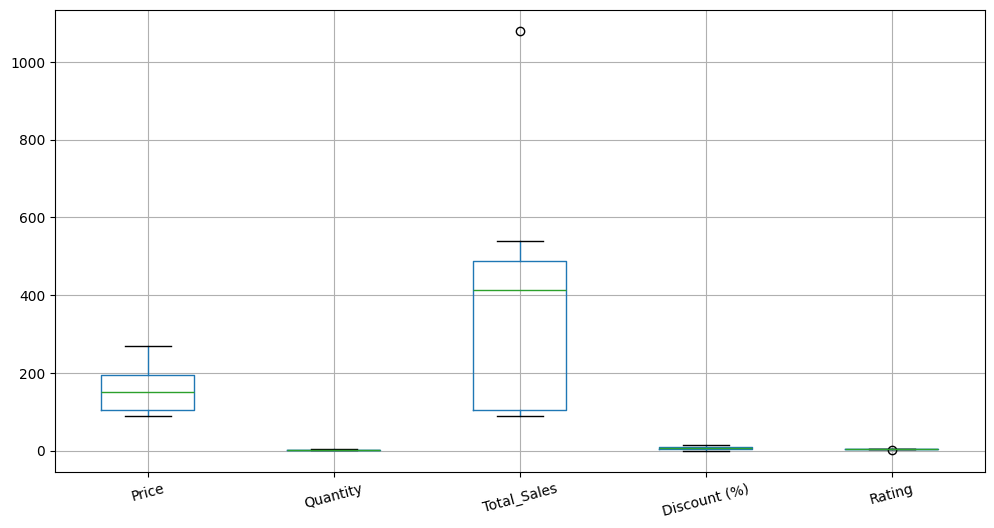

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(12,6))
df.boxplot(column=['Price', 'Quantity', 'Total_Sales', 'Discount (%)', 'Rating'])
plt.xticks(rotation=15)
plt.show()

In [40]:
import pandas as pd
import numpy as np

# Create dataset with missing values
data = {
    "Order_ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Customer_Name": ["Alice", "Bob", np.nan, "David", "Eva", "Frank", np.nan, "Hannah", "Ian", "Julia"],
    "Product": ["Laptop", "Phone", "Tablet", "Laptop", "Tablet", "Phone", "Laptop", "Tablet", "Phone", "Laptop"],
    "Price": [750, 500, np.nan, 800, 400, np.nan, 900, 450, 550, 700],
    "Quantity": [1, 2, 1, 1, np.nan, 3, 2, 1, 2, np.nan],
    "Total_Sales": [750, 1000, np.nan, 800, 400, np.nan, 1800, 450, 1100, 700],
    "Date": pd.to_datetime(["2024-02-01", "2024-02-02", np.nan, "2024-02-04", "2024-02-05",
                             "2024-02-06", "2024-02-07", "2024-02-08", np.nan, "2024-02-10"]),
    "Discount (%)": [10, np.nan, 5, 15, 10, np.nan, 20, 5, np.nan, 15],
    "Rating": [4.5, 4.0, np.nan, 5.0, 3.8, np.nan, 4.2, 4.7, 4.0, np.nan],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("missing_data.csv", index=False)

print("CSV file saved as 'missing_data.csv'")


CSV file saved as 'missing_data.csv'


**1️⃣ Check for Missing Data**

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv("missing_data.csv")

# Check for missing values
print(df.isnull().sum())


Order_ID         0
Customer_Name    2
Product          0
Price            2
Quantity         2
Total_Sales      2
Date             2
Discount (%)     3
Rating           3
dtype: int64


**2️⃣ Handling Missing Values: Different Approaches**

In [42]:
# Fill numerical columns with mean
df["Price"].fillna(df["Price"].mean(), inplace=True)
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)
df["Discount (%)"].fillna(df["Discount (%)"].mean(), inplace=True)
df["Rating"].fillna(df["Rating"].median(), inplace=True)
df["Total_Sales"].fillna(df["Total_Sales"].median(), inplace=True)


# Fill categorical columns with mode (most common value)
df["Customer_Name"].fillna(df["Customer_Name"].mode()[0], inplace=True)

# Fill missing dates with a placeholder
df["Date"].fillna("2024-01-01", inplace=True)  # Default date
df["Date"] = pd.to_datetime(df["Date"])  # Convert back to datetime format


C:\Users\lucky\AppData\Local\Temp\ipykernel_11060\1951908752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price"].fillna(df["Price"].mean(), inplace=True)
C:\Users\lucky\AppData\Local\Temp\ipykernel_11060\1951908752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

**3️⃣ Verify Missing Data is Handled**

In [43]:
print(df.isnull().sum())  # Should print all zeros if handled correctly

Order_ID         0
Customer_Name    0
Product          0
Price            0
Quantity         0
Total_Sales      0
Date             0
Discount (%)     0
Rating           0
dtype: int64


**4️⃣ Save the Cleaned Dataset**

In [44]:
df.to_csv("cleaned_data.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


****Data Transformation****

🔹 Step 1: Load Data

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Load your cleaned dataset
df = pd.read_csv("cleaned_data.csv")

#display first few rows
df.head()

,Order_ID,Customer_Name,Product,Price,Quantity,Total_Sales,Date,Discount (%),Rating
0,101,Alice,Laptop,750.00,1.0,750.0,2024-02-01,10.000000,4.5
1,102,Bob,Phone,500.00,2.0,1000.0,2024-02-02,11.428571,4.0
2,103,Alice,Tablet,631.25,1.0,775.0,2024-01-01,5.000000,4.2
3,104,David,Laptop,800.00,1.0,800.0,2024-02-04,15.000000,5.0
4,105,Eva,Tablet,400.00,1.5,400.0,2024-02-05,10.000000,3.8


🔹 Step 2: Apply MinMax Scaling (0 to 1)

In [46]:
scaler = MinMaxScaler()
df[['Price', 'Quantity', 'Total_Sales']] = scaler.fit_transform(df[['Price', 'Quantity', 'Total_Sales']])
df.head()

,Order_ID,Customer_Name,Product,Price,Quantity,Total_Sales,Date,Discount (%),Rating
0,101,Alice,Laptop,0.7000,0.00,0.250000,2024-02-01,10.000000,4.5
1,102,Bob,Phone,0.2000,0.50,0.428571,2024-02-02,11.428571,4.0
2,103,Alice,Tablet,0.4625,0.00,0.267857,2024-01-01,5.000000,4.2
3,104,David,Laptop,0.8000,0.00,0.285714,2024-02-04,15.000000,5.0
4,105,Eva,Tablet,0.0000,0.25,0.000000,2024-02-05,10.000000,3.8


🔹 Step 3: Standardization (Z-score normalization)

In [47]:
std_scaler = StandardScaler()
df[['Price', 'Quantity', 'Total_Sales']] = std_scaler.fit_transform(df[['Price', 'Quantity', 'Total_Sales']])
df.head()

,Order_ID,Customer_Name,Product,Price,Quantity,Total_Sales,Date,Discount (%),Rating
0,101,Alice,Laptop,7.835468e-01,-0.960769,-0.281026,2024-02-01,10.000000,4.5
1,102,Bob,Phone,-8.660254e-01,0.640513,0.388084,2024-02-02,11.428571,4.0
2,103,Alice,Tablet,-3.662786e-16,-0.960769,-0.214115,2024-01-01,5.000000,4.2
3,104,David,Laptop,1.113461e+00,-0.960769,-0.147204,2024-02-04,15.000000,5.0
4,105,Eva,Tablet,-1.525854e+00,-0.160128,-1.217780,2024-02-05,10.000000,3.8


🔹 Step 4: Log Transformation for Skewed Data

In [48]:
df["Price"] = np.log1p(df["Price"].clip(lower=0.0001))
df["Total_Sales"] = np.log1p(df["Total_Sales"].clip(lower=0.0001))

🔹 Step 5: Extract Date Components

In [49]:
df["Date"] = pd.to_datetime(df["Date"]) # Convert to datetime if not already
df["Year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["day_of_week"] = df["Date"].dt.day_of_week
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0) # Mark weekends

🔹 Step 6: Save the Transformed Dataset

In [50]:
df.to_csv("transformed_data.csv", index=False)
print("Transformed data saved!")

Transformed data saved!


**Encoding Categorical Variables.**

In [51]:
#load the transformed dataset 
df = pd.read_csv("transformed_data.csv")

#display first few rows
df.head()

,Order_ID,Customer_Name,Product,Price,Quantity,Total_Sales,Date,Discount (%),Rating,Year,month,day,day_of_week,is_weekend
0,101,Alice,Laptop,0.578604,-0.960769,0.000100,2024-02-01,10.000000,4.5,2024,2,1,3,0
1,102,Bob,Phone,0.000100,0.640513,0.327924,2024-02-02,11.428571,4.0,2024,2,2,4,0
2,103,Alice,Tablet,0.000100,-0.960769,0.000100,2024-01-01,5.000000,4.2,2024,1,1,0,0
3,104,David,Laptop,0.748327,-0.960769,0.000100,2024-02-04,15.000000,5.0,2024,2,4,6,1
4,105,Eva,Tablet,0.000100,-0.160128,0.000100,2024-02-05,10.000000,3.8,2024,2,5,0,0


Apply One-Hot Encoding (For Product Column)

In [52]:
df = pd.get_dummies(df, columns=["Product"], drop_first=True)

Apply Label Encoding (For Customer_Name)

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Customer_Name"] = label_encoder.fit_transform(df["Customer_Name"])

Save the Encoded Dataset

In [54]:
df.to_csv("encoded_data.csv", index=False)

print("Categorical variables encoded and dataset saved!")

Categorical variables encoded and dataset saved!


**Outlier detection and handling**

Detect Outliers (IQR Method)

In [68]:
Q1 = df[["Price", "Quantity", "Total_Sales"]].quantile(0.25)
Q3 = df[["Price", "Quantity", "Total_Sales"]].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[["Price", "Quantity", "Total_Sales"]] < (Q1 - 1.5 * IQR)) | 
            (df[["Price", "Quantity", "Total_Sales"]] > (Q3 + 1.5 * IQR)))

print(outliers.sum())

Price          0
Quantity       0
Total_Sales    1
dtype: int64


check the summary statistics of the Total_Sales column:

In [69]:
df["Total_Sales"].describe()

count    10.000000
mean      0.209395
std       0.410103
min       0.000100
25%       0.000100
50%       0.000100
75%       0.245968
max       1.261081
Name: Total_Sales, dtype: float64

Let's visualize Total_Sales using a box plot to confirm the outlier

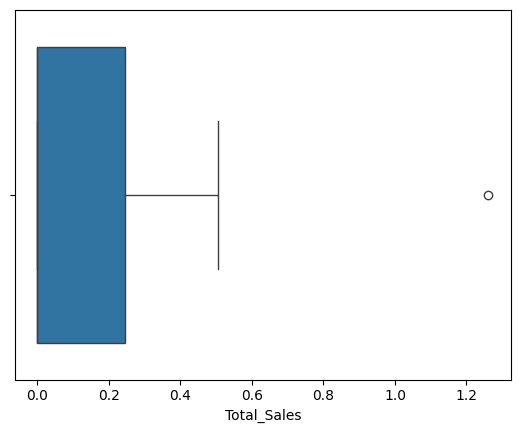

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Total_Sales"])
plt.show()

Find the row containing the outlier:

In [71]:
df[df["Total_Sales"] > df["Total_Sales"].quantile(0.75) + 1.5 * (df["Total_Sales"].quantile(0.75) - df["Total_Sales"].quantile(0.25))]

,Order_ID,Customer_Name,Price,Quantity,Total_Sales,Date,Discount (%),Rating,Year,month,day,day_of_week,is_weekend,Product_Phone,Product_Tablet,Total_Sales_Log,Total_Sales_Sqrt,Total_Sales_CubeRoot
6,107,0,1.020034,0.640513,1.261081,2024-02-07,20.0,4.2,2024,2,7,2,0,False,False,0.815843,1.122979,1.080391


Cap it(the row with outlier): If it's a valid but extreme value, replace it with the upper bound:

In [73]:
upper_bound = df["Total_Sales"].quantile(0.75) + 1.5 * (df["Total_Sales"].quantile(0.75) - df["Total_Sales"].quantile(0.25))
df["Total_Sales"] = df["Total_Sales"].apply(lambda x: upper_bound if x > upper_bound else x)

In [74]:
#Verify if the outlier is handled correctly: 
df.describe()

,Order_ID,Customer_Name,Price,Quantity,Total_Sales,Discount (%),Rating,Year,month,day,day_of_week,is_weekend,Total_Sales_Log,Total_Sales_Sqrt,Total_Sales_CubeRoot
count,10.00000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.0,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,105.50000,2.800000,0.272163,-4.996004e-17,0.144763,11.428571,4.280000,2024.0,1.800000,4.50000,2.400000,0.200000,0.150845,0.247572,0.289083
std,3.02765,2.616189,0.385060,1.054093e+00,0.242709,4.542568,0.358391,0.0,0.421637,3.24037,2.170509,0.421637,0.275922,0.405658,0.402173
min,101.00000,0.000000,0.000100,-9.607689e-01,0.000100,5.000000,3.800000,2024.0,1.000000,1.00000,0.000000,0.000000,0.000100,0.010000,0.046415
25%,103.25000,0.250000,0.000100,-9.607689e-01,0.000100,10.000000,4.050000,2024.0,2.000000,1.25000,0.250000,0.000000,0.000100,0.010000,0.046415
50%,105.50000,2.500000,0.000100,-1.601282e-01,0.000100,11.428571,4.200000,2024.0,2.000000,4.50000,2.500000,0.000000,0.000100,0.010000,0.046415
75%,107.75000,4.750000,0.527469,6.405126e-01,0.245968,14.107143,4.425000,2024.0,2.000000,6.75000,3.750000,0.000000,0.212738,0.431985,0.528796
max,110.00000,7.000000,1.020034,2.241794e+00,0.614770,20.000000,5.000000,2024.0,2.000000,10.00000,6.000000,1.000000,0.815843,1.122979,1.080391


Re-check the box plot to confirm changes

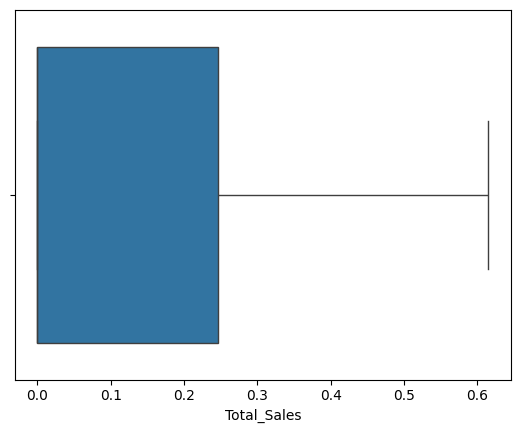

In [75]:
sns.boxplot(x=df["Total_Sales"])
plt.show()
